### Ingeniería de variables mixtas

Hemos visto, que las variables mixtas son aquellas cuyos valores contienen números y etiquetas. Una variable mixta puede tener:
- ya sean números O etiquetas en diferentes observaciones 
- ambos números Y etiquetas en cada observación.

La variable placa or marca de registro de un vehículo es un ejemplo de una variable que tiene números y letras combinadas en cada observación (e.j.,  NK11DGX), mientras que la variable número de pagos retrasados, cubierta en la sección 2, es un ejemplo de una variable que tiene números o etiquetas, cuyos valores pueden ser  0, 1, 2 o 3, o A y D.

Si necesitas actualizar tu memoria, revisa la sección 2 donde discutimos Tipos de Variables, en particular la lección sobre variables mixtas.

### Cómo podemos manipular las variables mixtas?

En algunas ocasiones podemos derivar variables significativas extrayendo la parte categórica de la variable en una nueva variable independiente de la parte numérica (la cual se asigna a otra variable). De esta forma, obtenemos 2 variables a partir de la variable original y por lo tanto, podemos proceder a manipular estas variable como cualquier otra variable categórica o numérica.

Exploremos cómo podemos hacerlo!



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Ejemplo 1: las observaciones de la variable tienen ya sea números o etiquetas

In [2]:
# En esta parte, trabajaremos con el ejemplo 
# simulado que usamos en la sección 2

# La variable open_il_24m indica:
# "Número de cuentas a plazos, abiertas en los últimos 24 meses".
# Cuentas a plazos son aquellas que al momento que se adquieren,
# tienen un periodo fijo y un monto fijo a pagar pre-acordado entre
# el prestamista y el prestador.

# Un Ejemplo es un préstamo para compra de un
# auto o un préstamo para estudios.
# Los prestamistas saben que van a pagar
# un número x de cuotas fijas

data = pd.read_csv('../sample_s2.csv')

data.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [3]:
# inspeccionemos la variable mixta

data['open_il_24m'].unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

La variable es mixta: algunas observaciones tienen
números y otras tienen uno de los tres códigos definidos a continuación:

In [4]:
# Significado (ficticio) de cada una de las letras/ códigos:

# 'A': no se pudo identificar a la persona
# 'B': datos no relevante
# 'C': la persona parece no tener ninguna cuenta abierta

Text(0, 0.5, 'Número prestamistas')

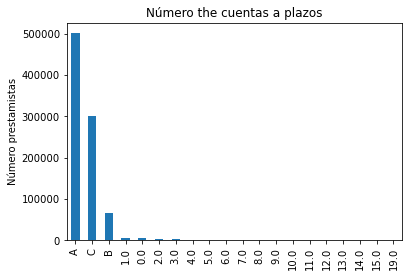

In [5]:
# inspeccionemos el número de observaciones
# por cada valor en la variable

fig = data['open_il_24m'].value_counts().plot.bar()
fig.set_title('Número the cuentas a plazos')
fig.set_ylabel('Número prestamistas')

In [6]:
# extraer la parte numérica
data['open_il_24m_numerical'] = pd.to_numeric(data["open_il_24m"],
                                              errors='coerce',
                                              downcast='integer')

In [7]:
# extraer la parte categórica 

data['open_il_24m_categorical'] = np.where(data['open_il_24m_numerical'].isnull(),
                                           data['open_il_24m'],
                                           np.nan)

data.head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
0,1077501,C,NaN,C
1,1077430,A,NaN,A
2,1077175,A,NaN,A
3,1076863,A,NaN,A
4,1075358,A,NaN,A


Fíjate como las observaciones cuyas variables categóricas tienen un valor, la variable numérica es nula NA  y viceversa.

In [8]:
# inspeccionemos aquellas observaciones donde la variable numéricas 
# no son nulas pero las categóricas si lo son y
# vice versa

data.dropna(subset = ['open_il_24m_numerical'], axis=0).head()

,id,open_il_24m,open_il_24m_numerical,open_il_24m_categorical
466285,68444620,0.0,0.0,NaN
466286,68547583,1.0,1.0,NaN
466287,67849662,0.0,0.0,NaN
466288,68506885,2.0,2.0,NaN
466289,68341763,4.0,4.0,NaN


In [9]:
# inspeccionemos los datos faltantes en las nuevas variables
# cuando las variables numérica no on nulas
# y la variable categórica es nula
# y vice versa

data.isnull().mean()

id                         0.000000
open_il_24m                0.000000
open_il_24m_numerical      0.975916
open_il_24m_categorical    0.024084
dtype: float64

### Ejemplo 1: las observacios de la variable contienen números y etiquetas 

In [10]:
# carguemos los datos del titanic

data = pd.read_csv('../titanic.csv', usecols=['ticket', 'cabin', 'survived'])

data.head()

,survived,ticket,cabin
0,1,24160,B5
1,1,113781,C22
2,0,113781,C22
3,0,113781,C22
4,0,113781,C22


In [11]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


In [12]:
data['ticket'].unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

Ambas variables 'cabin' y 'ticket' tienen una parte numérica 
y una parte categórica en sus valores


In [13]:
# extraemos la parte numérica y la parte categórica
# para la variable 'cabin' 

data['cabin_num'] = data['cabin'].str.extract('(\d+)') # captura la parte numérica
data['cabin_cat'] = data['cabin'].str[0] # captura la primera letra

data[['cabin', 'cabin_num', 'cabin_cat']].head()

,cabin,cabin_num,cabin_cat
0,B5,5,B
1,C22,22,C
2,C22,22,C
3,C22,22,C
4,C22,22,C


In [14]:
# extraemos la parte numérica y la parte categórica
# de la variable 'ticket' 

# la calidad de la variable 'ticket' no es muy buena, 
# así que no es mucho lo que se puede hacer con ella
# sin embargo, aquí te presentamos unas ideas:

# extraer la última letra del tiquete
data['ticket_num'] = data['ticket'].apply(lambda s: s.split()[-1])
data['ticket_num'] = pd.to_numeric(data['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extraer la primera parte del tiquete como una categoría
data['ticket_cat'] = data['ticket'].apply(lambda s: s.split()[0])
data['ticket_cat'] = np.where(data['ticket_cat'].str.isdigit(), np.nan,
                              data['ticket_cat'])

data[['ticket', 'ticket_num', 'ticket_cat']].head(20)

,ticket,ticket_num,ticket_cat
0,24160,24160.0,NaN
1,113781,113781.0,NaN
2,113781,113781.0,NaN
3,113781,113781.0,NaN
4,113781,113781.0,NaN
5,19952,19952.0,NaN
6,13502,13502.0,NaN
7,112050,112050.0,NaN
8,11769,11769.0,NaN
9,PC 17609,17609.0,PC


In [15]:
data['ticket_cat'].unique()

array([nan, 'PC', 'W.E.P.', 'WE/P', 'F.C.', 'P/PP', 'C.A.', 'C.A./SOTON',
       'S.O.P.', 'F.C.C.', 'SC/AH', 'W./C.', 'S.O.C.', 'SC/PARIS',
       'S.W./PP', 'W/C', 'SCO/W', 'SO/C', 'SC/Paris', 'SC', 'S.O./P.P.',
       'S.C./PARIS', 'SC/A.3', 'SW/PP', 'CA', 'SOTON/O2', 'C',
       'SOTON/O.Q.', 'A/4', 'PP', 'A/5', 'A./5.', 'A/5.', 'SOTON/OQ',
       'S.P.', 'SC/A4', 'AQ/3.', 'STON/O2.', 'A.', 'LINE', 'STON/O',
       'AQ/4', 'A/S', 'A.5.', 'A4.', 'A/4.', 'Fa', 'S.C./A.4.', 'LP',
       'CA.', 'STON/OQ.'], dtype=object)

<AxesSubplot:>

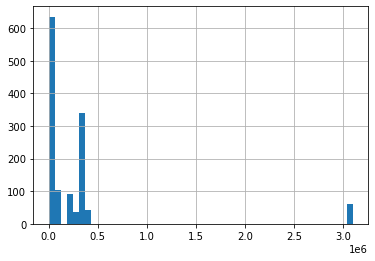

In [16]:
data['ticket_num'].hist(bins=50)